## With Forest-Type (UCI dataset)

In [41]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
from evclust.utils import plotting, display_results_fuzzy_partition, display_results_evidential
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from evclust.datasets import load_thyroid

from evclust.ecm import ecm
from evclust.wecm_new_barycenter import wecm
from evclust.fcm.fcm_keller2000 import fcm as fcm_keller2000
from evclust.fcm.fcm_wang2004 import fcm as fcm_wang2004
from evclust.fcm.fcm_frigui2004 import scad1
from evclust.fcm.fcm_frigui2004 import scad2
from evclust.fcm.ifwfcm_xing2014 import fcm as ifwfcm_xing2014
from evclust.fcm.ifwfcm_kd_xing2014 import fcm as ifwfcm_kd_xing2014

Instances: 215; Features: 5; Clusters: class    3
dtype: int64
Instances 215 - Features 5 - Class 3
    f1    f2   f3   f4   f5
0  107  10.1  2.2  0.9  2.7
1  113   9.9  3.1  2.0  5.9
2  127  12.9  2.4  1.4  0.6
3  109   5.3  1.6  1.4  1.5
4  105   7.3  1.5  1.5 -0.1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


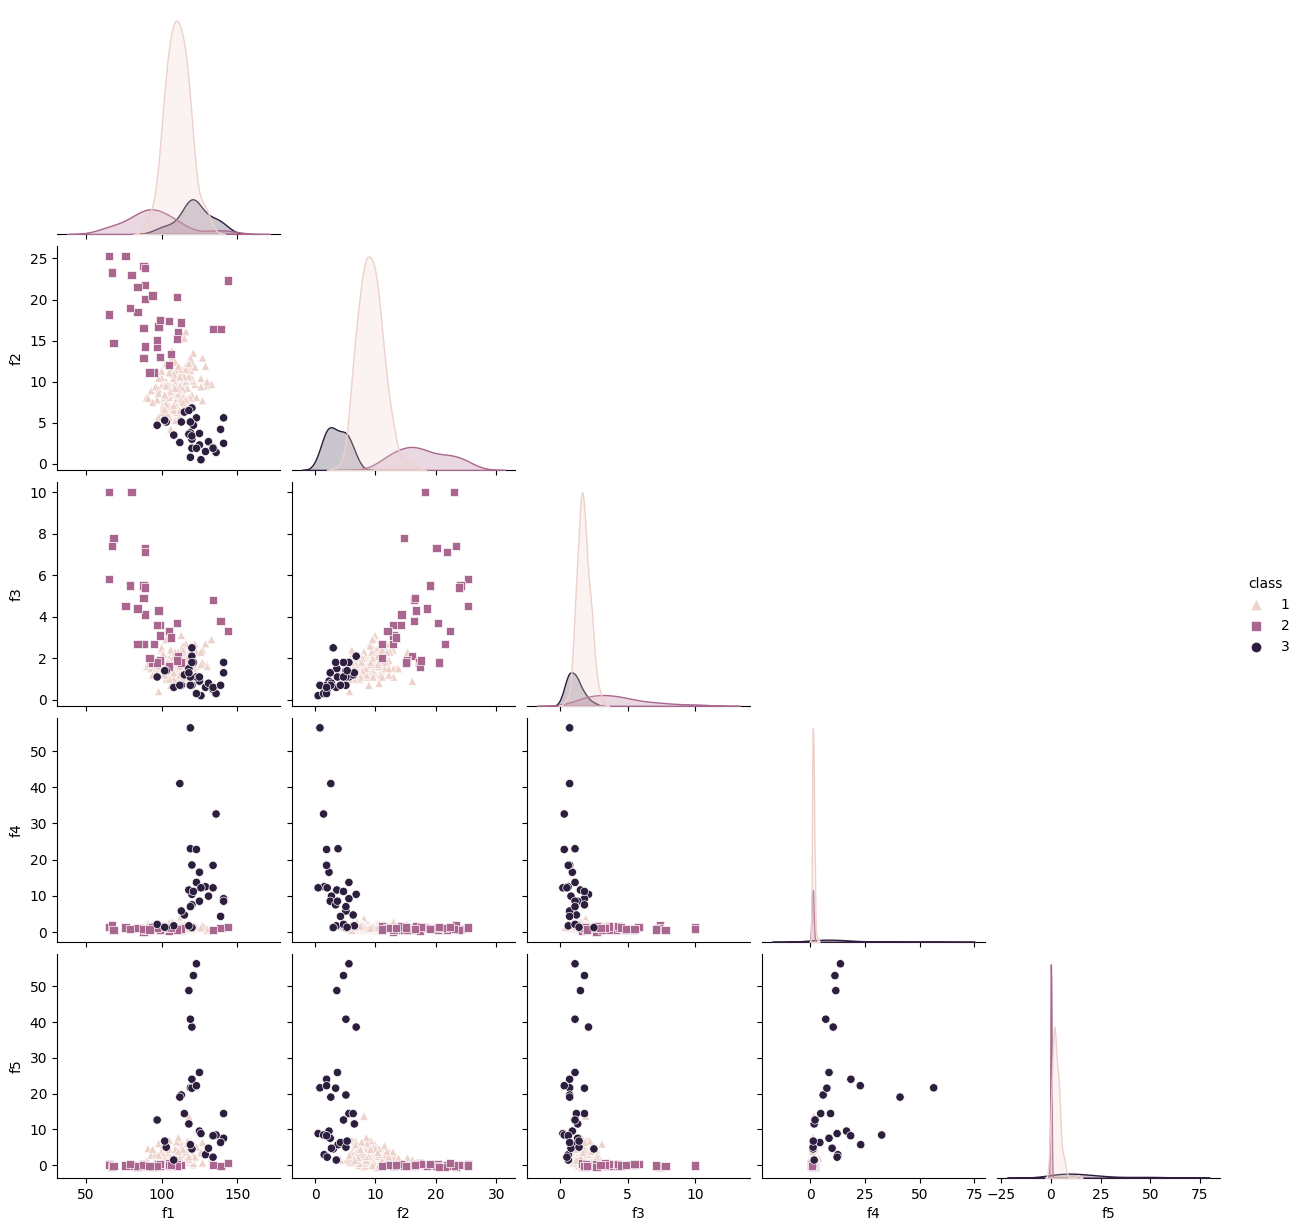

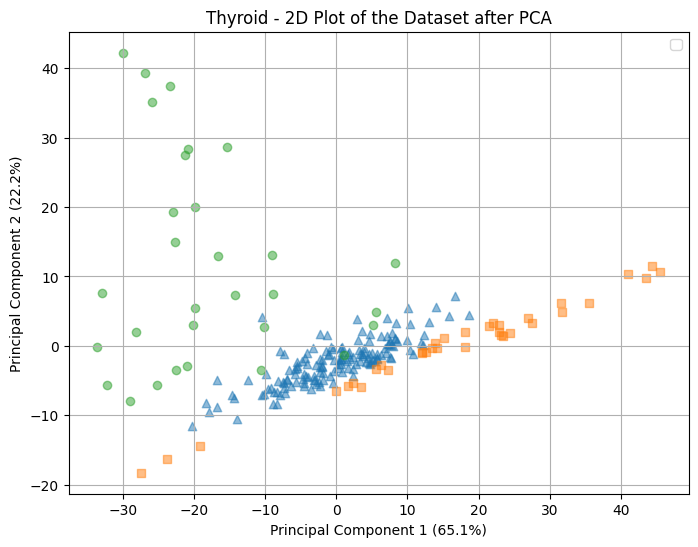

Instances: 215; Features: 5; Clusters: class    3
dtype: int64


In [42]:
### Thyroid dataset
# fetch dataset 
thyroid = load_thyroid()

# data (as pandas dataframes) 
X = thyroid.iloc[:, 1:]
y = pd.DataFrame(thyroid.iloc[:, 0])
c = 3

print(f"Instances: {X.shape[0]}; Features: {X.shape[1]}; Clusters: {y.nunique()}")

markers = ['^', 's', 'o']
plotting(X, y, "Thyroid", matrix_plot=True, markers=markers)
print(f"Instances: {X.shape[0]}; Features: {X.shape[1]}; Clusters: {y.nunique()}")

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])
# Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

In [3]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
ecm_models = np.array([])
for i in range(10):
    model = ecm(x=X, c=c, beta=2, alpha=1, delta=delta, init="None", epsi=1e-5)
    ecm_models = np.append(ecm_models, model)

ecm_models = sorted(ecm_models, key=lambda x: x['crit'])

J values: [4.50158269597727, 4.501583174395278, 4.5015840186162785, 4.501597002105099, 4.501601176497223, 4.5016015326446075, 4.501603214327855, 4.501603715270842, 4.5016042950657305, 4.501606412402107]
ARI values: [0.7813015910600709, 0.7813015910600709, 0.7813015910600709, 0.7662622745668856, 0.7662622745668856, 0.7662622745668856, 0.7662622745668856, 0.7662622745668856, 0.7662622745668856, 0.7662622745668856]
NS values: [1.7370287854541568, 1.7300309310460418, 1.8015863673212908, 1.795903203745471, 1.7219656830503032, 1.7795202568324184, 1.7213357898344728, 1.4162472855324268, 1.4161828069118814, 1.7954465287377759]
NMI values: [0.7141759309866615, 0.7141759309866618, 0.7141759309866618, 0.7010352410395829, 0.7010352410395829, 0.701035241039583, 0.7010352410395829, 0.7010352410395829, 0.7010352410395829, 0.7010352410395829]


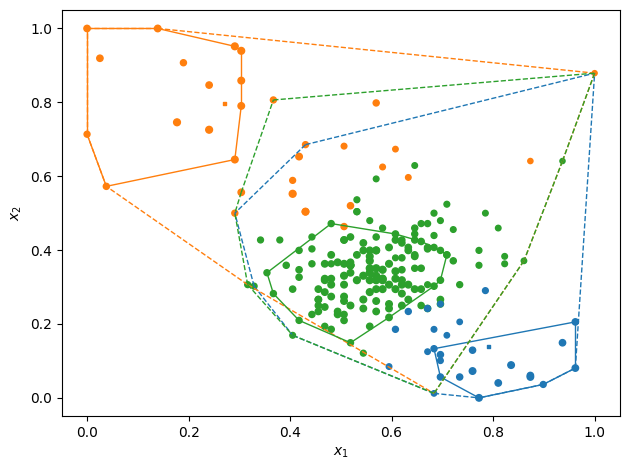

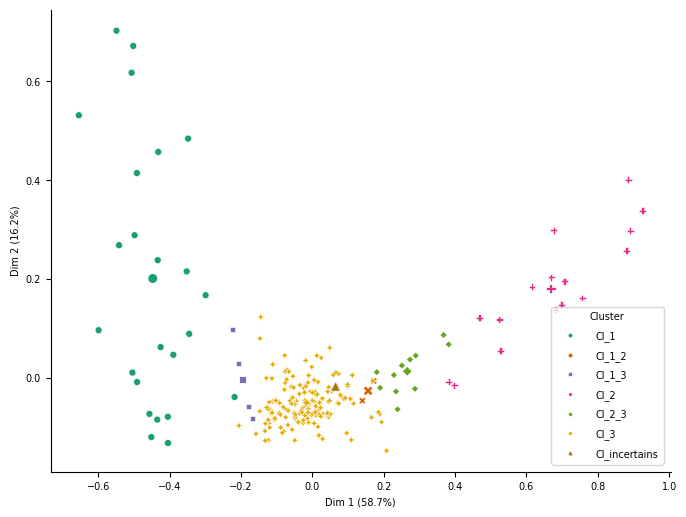

In [4]:
display_results_evidential(X, ecm_models, numeric_labels)

## Weighted ECM (WECM)

In [47]:
# %%capture
wecm_models = np.array([])
d = X.shape[1]
delta = np.sqrt(20)
for i in range(10):
    model = wecm(x=X, c=c, beta=2, alpha=1, delta=delta, epsilon=1e-3, init="None", stopping_factor="center")
    wecm_models = np.append(wecm_models, model)

wecm_models = sorted(wecm_models, key=lambda model: model['crit'])

Initial weights: 
 [[0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]]
Initial prototypes: 
 [[ 0.73963433  0.42617149  0.14409236  0.08093905  0.05565691]
 [ 0.73469534  0.24479716  0.28764927 -0.08734208  0.12880809]
 [ 0.56536776  0.14107013  0.1253588   0.10520728  0.19113878]]
[1, 0.18456061127893744]
[2, 0.13575094663806772]
[3, 0.05395934871422353]
[4, 0.031557133577039424]
[5, 0.027284566123137798]
[6, 0.025569975651754763]
[7, 0.023545894888949915]
[8, 0.022002024205835614]
[9, 0.020388079309931778]
[10, 0.01930260175603133]
[11, 0.018967644979646266]
[12, 0.01894991034932426]
[13, 0.01942609519449877]
[14, 0.018804645789601716]
[15, 0.017436360101216783]
[16, 0.01651015001229924]
[17, 0.01635463289181146]
[18, 0.016412643132356033]
[19, 0.01646047441651417]
[20, 0.016460814683833012]
[21, 0.016364723259432976]
[22, 0.016196275826949248]
[23, 0.016000208709427012]
[24,

J values: [0.010664950289373185, 0.01090089407257268, 0.011630855369696031, 0.015943863790506073, 0.01601254158345245, 0.017371065760887306, 0.019877058626231542, 0.020735818797104212, 0.020746829033664205, 0.021639187958941423]
ARI values: [0.1653550684695937, 0.24731209070002688, 0.29184741771149325, 0.2027339801513895, 0.2583191259257559, 0.17364310206807723, 0.25981451941152306, 0.3259447095091423, 0.3259447095091423, 0.18579400556584472]
NS values: [0.5951634704130456, 1.3825744917138205, 1.3063860778405352, 2.301978584493139, 1.6626470977064558, 1.6958563927276389, 1.8172756720862286, 1.9518514054512066, 2.043180752497406, 0.4086719557957205]
NMI values: [0.2918622140323678, 0.3323535716777861, 0.2945378004874375, 0.2033252630846056, 0.22976072082363339, 0.2992154425116227, 0.4188078162902454, 0.3099981287690524, 0.3099981287690524, 0.30074028319249074]


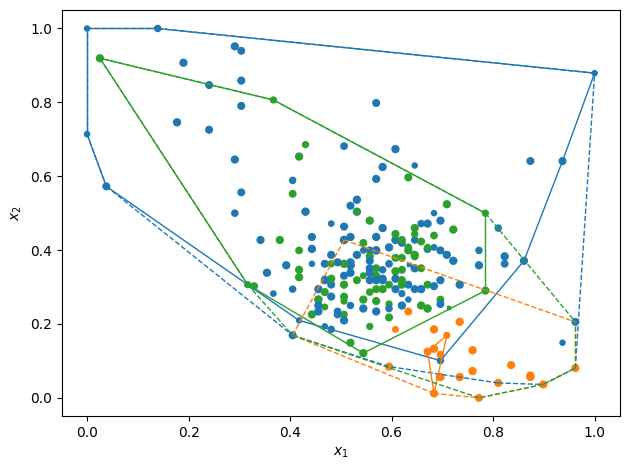

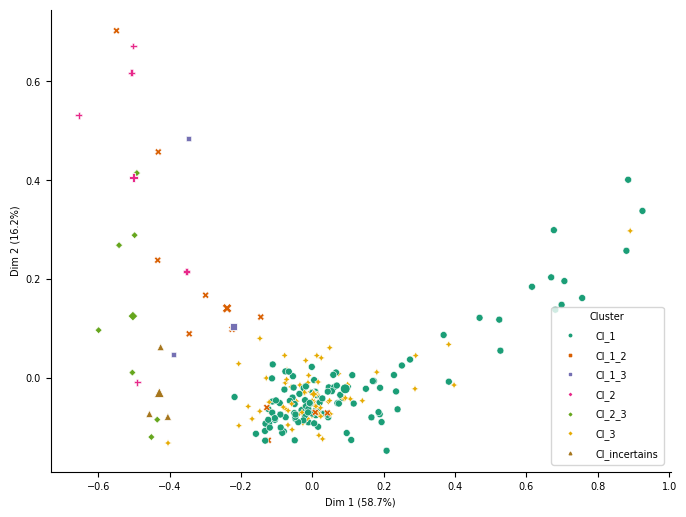

In [48]:
display_results_evidential(X, wecm_models, numeric_labels)

# Weighted FCM - Keller et al. 2000

In [27]:
%%capture
keller_models = np.array([])
w0 = np.ones((c, X.shape[1])) / X.shape[1]
for i in range(10):
    model = fcm_keller2000(X, c=c, verbose=True, epsilon=1e-6, init="None")
    keller_models = np.append(keller_models, model)
keller_models = sorted(keller_models, key=lambda model: model['obj_func'])

J values: [0.02118975538313656, 0.021189758057691476, 0.02118978926344163, 0.021189817166485242, 0.021189862253785777, 0.021190163207066206, 0.021190202539416943, 0.03208271015465998, 0.0320833810443042, 0.035565401363632045]
ARI values: [0.2771266885365329, 0.2771266885365329, 0.2771266885365329, 0.2771266885365329, 0.2771266885365329, 0.2771266885365329, 0.2771266885365329, 0.20179564436614483, 0.20097152909992624, 0.289453517719337]
NMI values: [0.3079635896595181, 0.30796358965951814, 0.30796358965951814, 0.30796358965951814, 0.30796358965951814, 0.30796358965951814, 0.30796358965951814, 0.34158162949476484, 0.3548581999719469, 0.3792169964610444]


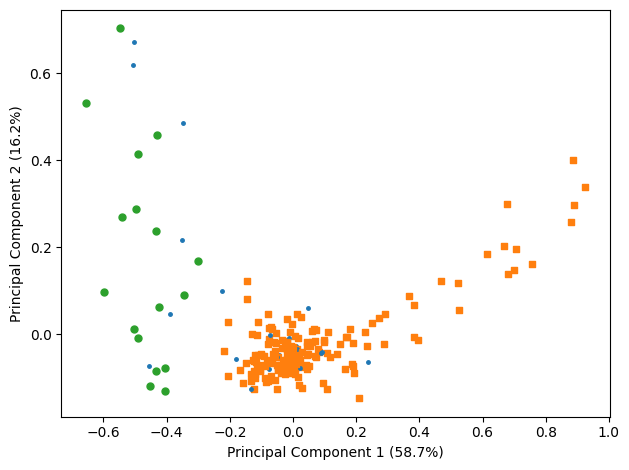

In [28]:
display_results_fuzzy_partition(X, keller_models, numeric_labels)

# Weighted FCM Wang 2004

In [39]:
%%capture
wang_models = np.array([])
for i in range(2):
    model = fcm_wang2004(X, c, w_beta=3.2, verbose=True, init="None", epsilon=1e-6)
    wang_models = np.append(wang_models, model)
wang_models = sorted(wang_models, key=lambda model: model['obj_func'])

J values: [0.3017780988412361, 0.3017785329873004]
ARI values: [0.6926722163668958, 0.6926722163668958]
NMI values: [0.6615011914985233, 0.6615011914985233]


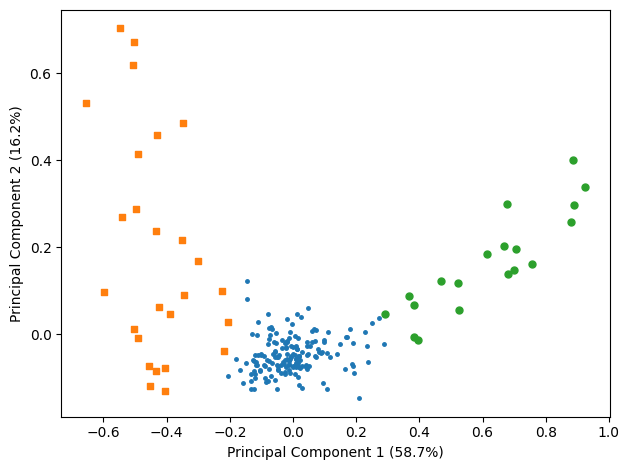

In [40]:
display_results_fuzzy_partition(X, wang_models, numeric_labels)

# SCAD1

In [29]:
%%capture
scad1_models = np.array([])
for i in range(10):
    model = scad1(X, c, verbose=True, K=2, epsilon=1e-6, init="None")
    scad1_models = np.append(scad1_models, model)
scad1_models = sorted(scad1_models, key=lambda model: model['obj_func'])


J values: [3.1913334744536783, 3.3560560118642977, 3.361087710981672, 4.1440610100468085, 4.49265209476062, nan, nan, nan, 4.599531953881038, nan]
ARI values: [0.6736598228368605, 0.6592062787496176, 0.6592062787496176, 0.41801125072982587, 0.4787160891826061, 0.0, 0.0, 0.0, 0.2955379615759163, 0.0]
NMI values: [0.6354097099559031, 0.6244882453798737, 0.6244882453798737, 0.3974016654005233, 0.5975328427857102, 0.0, 0.0, 0.0, 0.41608776201304926, 0.0]


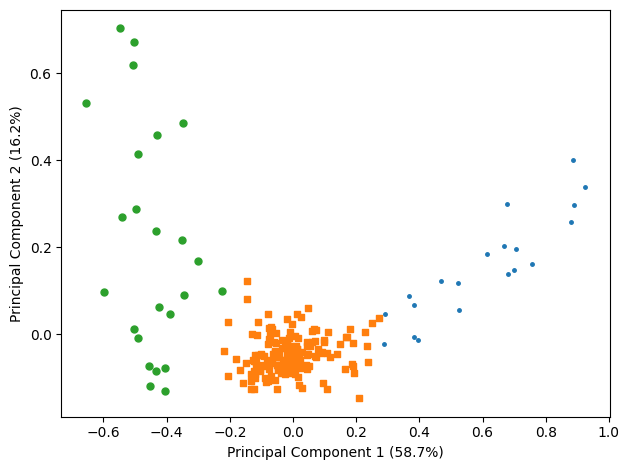

In [30]:
display_results_fuzzy_partition(X, scad1_models, numeric_labels)

# SCAD2

In [31]:
%%capture
scad2_models = np.array([])
for i in range(10):
    model = scad2(X, c, verbose=True, epsilon=1e-6, init="None")
    scad2_models = np.append(scad2_models, model)
scad2_models = sorted(scad2_models, key=lambda model: model['obj_func'])


J values: [0.026282837280486585, 0.02628293666356775, 0.026283062592624237, 0.026283089157877856, 0.02628319826116802, 0.026283279633720222, 0.026283353275621816, 0.026283391016489133, 0.02628341043457935, 0.026287153266843024]
ARI values: [0.3829011039152118, 0.3829011039152118, 0.3829011039152118, 0.3829011039152118, 0.3829011039152118, 0.3829011039152118, 0.3829011039152118, 0.3829011039152118, 0.3829011039152118, 0.3829011039152118]
NMI values: [0.4281298022552342, 0.4281298022552342, 0.4281298022552342, 0.4281298022552342, 0.4281298022552342, 0.4281298022552342, 0.4281298022552342, 0.4281298022552342, 0.4281298022552342, 0.4281298022552342]


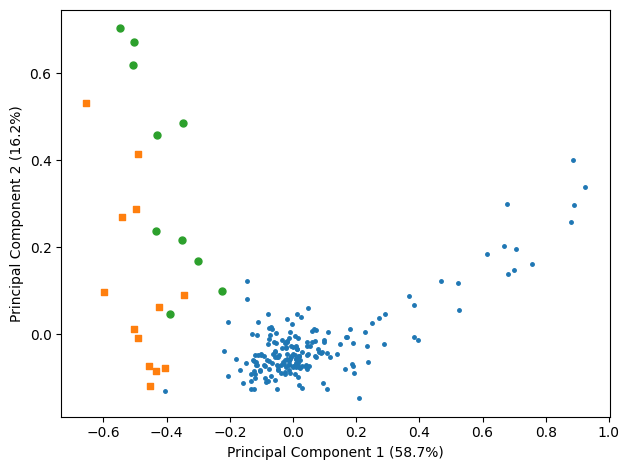

In [32]:
display_results_fuzzy_partition(X, scad2_models, numeric_labels)

# IFWFCM - Xing et al. 2014

In [33]:
%%capture
ifwfcm_models = np.array([])
for i in range(10):
    model = ifwfcm_xing2014(X, c, verbose=True, epsilon=1e-6, init="None")
    ifwfcm_models = np.append(ifwfcm_models, model)
ifwfcm_models = sorted(ifwfcm_models, key=lambda model: model['obj_func'])

J values: [0.2451637131108676, 0.24519590800438196, 0.24519600371633193, 0.24519603811117416, 0.24519618028177903, 0.24519622110091976, 0.24519633658386583, 0.24520251252419184, 0.24520252886633045, 0.24520274274725412]
ARI values: [0.6101097434593243, 0.5954562869803353, 0.5954562869803353, 0.5954562869803353, 0.5954562869803353, 0.5954562869803353, 0.5954562869803353, 0.5954562869803353, 0.5954562869803353, 0.5954562869803353]
NMI values: [0.5755273420425114, 0.5642810566273593, 0.5642810566273592, 0.5642810566273592, 0.5642810566273592, 0.5642810566273592, 0.5642810566273592, 0.5642810566273592, 0.5642810566273593, 0.5642810566273592]


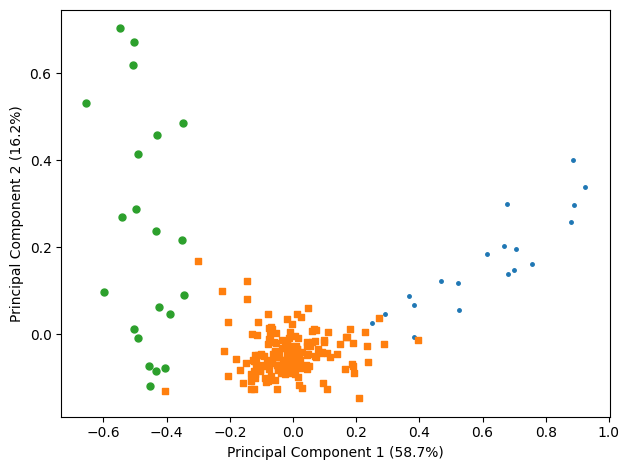

In [34]:
display_results_fuzzy_partition(X, ifwfcm_models, numeric_labels)

# IFWFCM_KD Xing 2014

In [35]:
%%capture
ifwfcm_kd_models = np.array([])
for i in range(10):
    model = ifwfcm_kd_xing2014(X, c, verbose=True, epsilon=1e-6, init="None")
    ifwfcm_kd_models = np.append(ifwfcm_kd_models, model)
ifwfcm_kd_models = sorted(ifwfcm_kd_models, key=lambda model: model['obj_func'])

J values: [3.0372310150578588, 3.0372311006740595, 3.0372311841541273, 3.0372312646144914, 3.037231317585781, 3.0372313812844554, 3.0372313817874157, 3.037244735447786, 3.0372448041357547, 3.03724518611926]
ARI values: [0.6238339429629411, 0.6238339429629411, 0.6238339429629411, 0.6238339429629411, 0.6238339429629411, 0.6238339429629411, 0.6238339429629411, 0.6238339429629411, 0.6238339429629411, 0.6238339429629411]
NMI values: [0.5827458356980225, 0.5827458356980225, 0.5827458356980225, 0.5827458356980225, 0.5827458356980225, 0.5827458356980225, 0.5827458356980226, 0.5827458356980226, 0.5827458356980226, 0.5827458356980226]


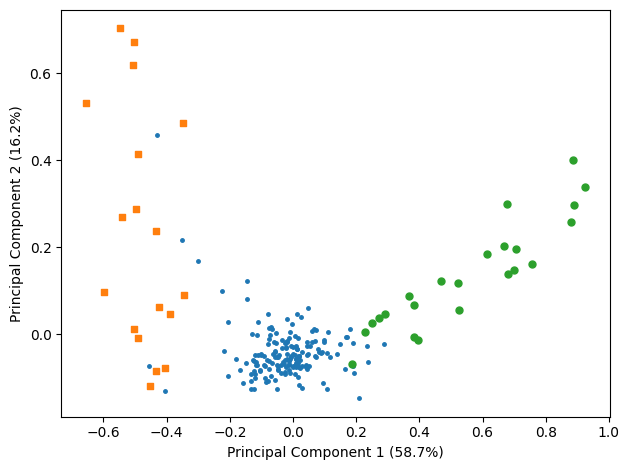

In [36]:
display_results_fuzzy_partition(X, ifwfcm_kd_models, numeric_labels)